# Proposta do curso 📝

Entender os fundamentos do deep learning, utilizando o Keras, por meio de um estudo de caso que será sobre classificações de roupas e sapatos para um E-comerce fictício. O objetivo será classificá-las de forma automatizada, de modo que ao informar a imagem o modelo será capaz de corretamente classificar a peça. Iremos tratar a entrada dos dados, criar o modelo, treiná-lo e testado, validando-o no final, por meio da sua acurácia.

In [16]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [17]:
dataset = keras.datasets.fashion_mnist

O dataset carregado retorna uma tupla com duas matrizes, sendo uma para a imagem e outra para o rótulo.

### Segmentando o conjunto de dados entre imagens e rótulos (identificações) 🗡️

In [18]:
# Legenda:

# imagens_treino : X_train
# imagens_test: X_test
# identificações_treino : y_train
# identificações_teste : y_test

((X_train, y_train), (X_test, y_test)) = dataset.load_data()

### Visualizando mais de perto o conjunto de dados

In [19]:
print(f"Formato das imagens para treino: {(X_train).shape}")
print(f"Formato dos rótulos para treino: {(y_train).shape}")

print("")

print(f"Formato das imagens para teste: {(X_test).shape}")
print(f"Formato dos rótulos para teste: {(y_test).shape}")


Formato das imagens para treino: (60000, 28, 28)
Formato dos rótulos para treino: (60000,)

Formato das imagens para teste: (10000, 28, 28)
Formato dos rótulos para teste: (10000,)


- Entendendo a saída do shape:

Se reparar, justamente para a imagem, o shape apresenta três parâmetros, sendo o primeiro relativo à sua quantidade, enquanto os demais outros o seu formato, que é de 28 pixels por 28 pixel. Por outro lado, como o rótulo não é uma imagem, possui apenas a sua respectiva quantidade no dataset.  

### Visualizando uma imagem do dataset:

Text(0.5, 1.0, '9')

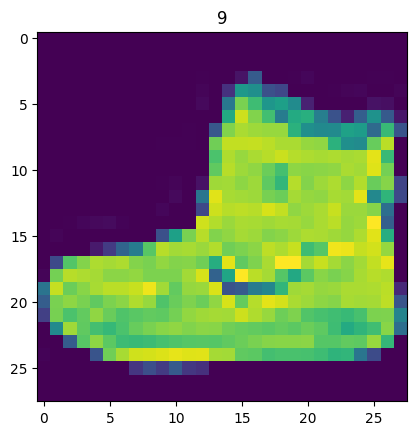

In [20]:
plt.imshow(X_train[0])
plt.title(y_train[0])

Olhando a imagem acima, nota-se que  o título que ela está recebendo é um número, e não uma palavra que faz referência ao tipo de objeto que parece ser uma bota. Além disso, no código, em Text, nota-se que o retorno de rótulos é um array.

In [21]:
# Observando melhor:
y_train

# Parece ser um array que apresenta elementos que
# começam no 0 e vão até o 9.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Números que se referem aos tipos das imagens, aparentemente, e que começam do 0, indo até o 9... Será que esses números não se referem aos itens ou seus respectivos tipos ? Vejamos...

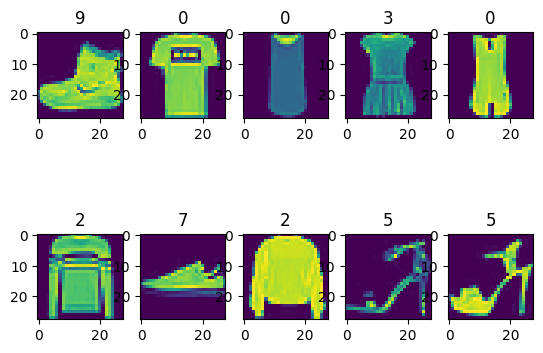

In [22]:
total_classificacoes = 10

for imagem in range(total_classificacoes):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(X_train[imagem])
  plt.title(y_train[imagem])

Segundo a imagem, de fato os números estão atrelados ao tipo de item do dataset, de modo que o 9 seria para bota, enquanto que 7 para tênis, por exemplo.

- Mostrando as mesmas imagens agora com o nome das categorias:

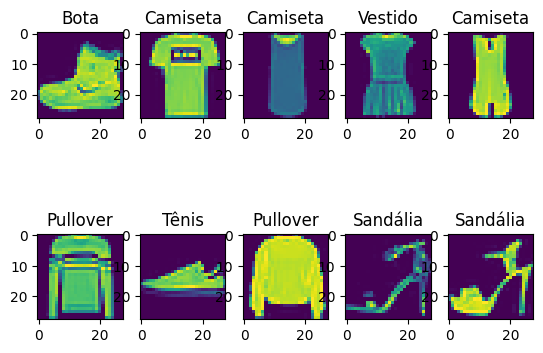

In [23]:
nome_categorias = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa',
                   'Tênis', 'Bolsa', 'Bota']

for imagem in range(total_classificacoes):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(X_train[imagem])
  plt.title(nome_categorias[y_train[imagem]])

Verificando a variação da coloração da imagem, com auxílio da barra de cor, verifica-se que pelo a menos a gradação varia de 0 a 250. Isso apresenta uma amplitude considerável, podendo aumentar o ruído e dificultar o treinamento e, consequentemente, a precisão do modelo em sua previsão, aumentando a sua perda. Em virtude disso, cabe realizar uma normalização dessa amplitude, garantindo que os valores que simbolizam a cor varia numa amplitude de 0 a 1. Vejamos:

### Criando o modelo com o Keras 🤖

**Como a rede neural com keras funciona:** O keras é uma biblioteca de redes neurais de alto nível que opera "em cima" do tensorflow para realizar suas operações, sendo justamente esse o motivo pelo qual o vinculamos com o tensorflow.

Além disso, visualizando o código abaixo, nota-se uma razoável diferença do keras em relação ao Pytorch, a começar por sua entrada, na qual nesse bastamos passar os dados de entrada, precisando antes apenas, se não estão, transformá-los em tensor.

Por outro lado, no keras, não é possível passar entradas com mais de uma dimensão, uma vez que ele não lida bem com dados multi-dimensionais. Assim, deve-se sempre "achatar" os dados, via o método Flatten, transformando os dados de entrada que poderiam possuir mais de uma dimensão em um tensor e/ou vetor unidimensional.

#### Entendendo o código

- Camada de entrada:

Nela achata os a entrada. (como no caso a entrada é de uma imagem, passamos as dimensões dela)

`keras.layers.Flatten(input_shape = (28, 28))`

- Camada escondida (ou de processamento):

Relativa ao processamento do modelo de rede neural, sendo o local no qual passa-se as funções de ativações não lineares que tornam os modelos capazes de aprender elementos complexos e os representar, uma vez que a partir disso, junto da integração dos "n" neurônios existentes, torna-se capaz de realizar funções não lineares e, portanto, potencialmente mais complexas. Para essa presente implementação, estou utilizando a abordagem **Dense** para criar a camada escondida, a qual garante que todos os neurônios se comuniquem entre si.
Como parâmetros eu passo a quantidade de neurônios que eu desejo na camada e a função de ativação, que no caso será a *relu*.

`keras.layers.Dense(256, activation = tensorflow.nn.relu)`

- Camada de saída:

Como estou num cenário de classificação, nessa parte informo a quantidade de classes que deverão ser classificadas, bem como informo a função de ativação de saída. Além disso, uma vez que estou utilizando a abordagem Dense, continuo a utilizando nessa etapa, para que todos os neurônios da camada escondida se comuniquem com os neurônios de saída.

`keras.layers.Dense(10, activation = tensorflow.nn.softmax )`



### Compreendendo as funções de ativações ⚡

São funções matemáticas que determinam a saída de um neurônio com base nos dados de entrada, garantindo que esses produzam valores diferentes, os quais, a depender da função de ativação, possuirão valor negativo, zero, ou positivo, influindo na "percepção" da rede acerca do que a ela foi proposto, como numa classificação ou previsão.

Em analogia, é útil pensar nas funções de ativações como o limiar que os neurônios biológicos possuem à passagem ou não de informação. É semelhante, na forma em que a saída, como produto das funções de ativação, irá produzir efeitos diferentes na rede, como se passasse uma ou outra informação, afetando na sua classificação, previsão e etc.

Não obstante, na integração com os "n" neurônios existentes no modelo, bem como com as funções lineares dos neurônios de entrada, são o que possibilita os neurônios aprenderem informações complexas e as representá-las, tendo em vista que conseguem trabalhar com funções não lineares, como a reLu.

> ### reLu

Função de ativação não linear, que atribui valores negativos ou zero ao próprio zero, possuindo um intervalo até o valor máximo que é 1. Justamente pela existência desse intervalo, que o gradiente para essa função se torna existente, permitindo que o modelo consiga ser mais complexo, percebendo os detalhes e nuances dos dados.

> ### softmax

Função de ativação que transforma a saída numa função de probabilidade de modo que o seu total seja 1. Assim, a cada uma das classes, para um presente neurônio respectivo a classe, apresentará uma probabilidade de tal item ser equivalente àquela classe, de modo que o termo com a maior probabilidade será considerado ressonante à determinada classe. Essa função é muito utilizada na camada de saída de redes neuras para classificação de multiclasses - e é o caso desse notebook.


### Visualizando a reLu e softmax 🔎

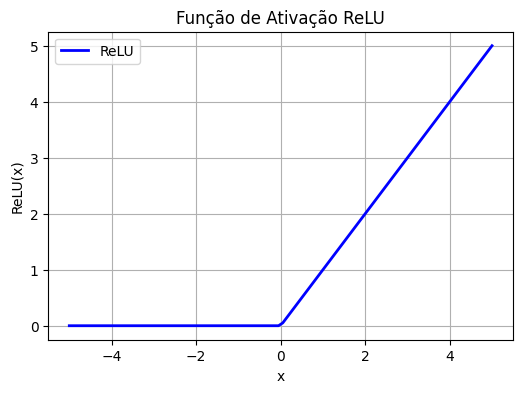

In [26]:
# Definindo a função ReLU
def relu(x):
    return np.maximum(0, x)

# Criando uma série de valores para x
x = np.linspace(-5, 5, 100)

# Calculando os valores de y usando a função ReLU
y = relu(x)

# Plotando o gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='ReLU', color='b', linewidth=2)
plt.title('Função de Ativação ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()
plt.show()

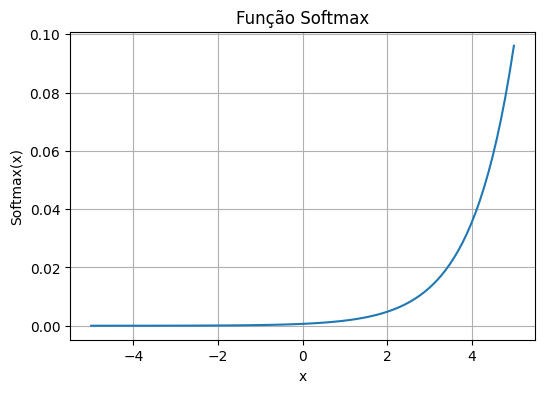

In [27]:
# Definindo a função Softmax
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=0)

# Criando uma série de valores para x
x = np.linspace(-5, 5, 100)

# Calculando os valores de y usando a função Softmax
y = softmax(x)

# Plotando o gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title('Função Softmax')
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.grid(True)
plt.show()

> **Modelo**

In [28]:
modelo_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax )
])

In [29]:
modelo_1.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

In [30]:
# Treinando o modelo:

modelo_1.fit(X_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 3.5198


### Normalizando as imagens 📏

No contexto do machine learning, incluindo o deep learning, faz-se necessário normalizar os dados de entradas aos modelos, garantindo que possuam escala ou uma menor amplitude, fomentando um menor viés e ruído.

Nesse sentido, ao presente notebook, verificarei a escala de variação das imagens do dataset, referente a gradação de sua cor.

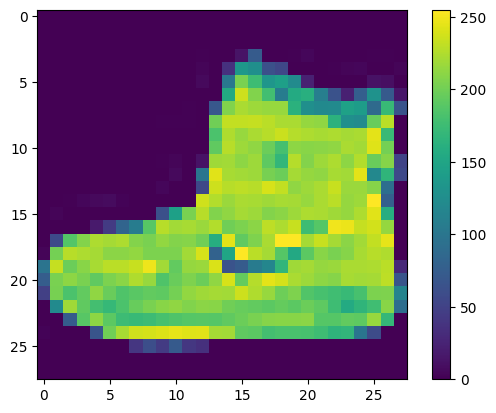

In [24]:
plt.imshow(X_train[0])
plt.colorbar()

Antes de realizar a normalização da imagem, a perda está sendo entorno de 3.5 aproximadamente. Veremos agora com a normalização:

In [32]:
# Normalizando os dados:

X_train = X_train / float(255)

In [33]:
modelo_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax )
])

modelo_2.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

# Treinando o modelo com a normalização:
modelo_2.fit(X_train, y_train)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.4844


Comparando ambas as perdas, tanto do modelo 1 quanto do modelo 2, nota-se que a normalização produz uma redução de perda substancial, justamente pela sua redução de amplitude, que garante menor ruído ao modelo, aumentando a sua compreensão/ análise e, portanto, precisão.

### Adicionando mais camadas ao modelo 🍰

Será que se adicionar mais camadas escondidas, que sirvam de intermédio ou "entreposto" à camada de saída o modelo melhora a sua precisão ? Vejamos...

In [36]:
modelo_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax )
])

modelo_3.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

# Treinando o modelo com a normalização:
modelo_3.fit(X_train, y_train)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.4751


💬

Bom, vi que a regra que podemos conceber *a priori*, de que aumentar a quantidade de camadas escondidas ao modelo, visando uma maior precisão e, assim, menor perda nem sempre ocorre, mas por quê ? Isso ocorre por quatro motivos principais, a saber, gradiente explodindo ou desaparecendo, overfitting, dificuldade de otimização, introdução de redundância ou informações relevantes.

- Gradiente explodindo ou desaparecendo:

Adicionar mais camadas pode aumentar a profundidade da rede neural, o que pode tornar o treinamento mais difícil. À medida que os gradientes são propagados para camadas mais profundas durante o treinamento, eles podem se tornar muito pequenos (gradiente desaparecendo) ou muito grandes (gradiente explodindo), dificultando a convergência do modelo.

- Overfitting:

Adicionar mais camadas pode aumentar a capacidade do modelo, tornando-o mais complexo. Em alguns casos, uma rede muito complexa pode levar ao sobreajuste (overfitting), onde o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados de teste.


- Dificuldade de otimização:

À medida que a rede se torna mais profunda, o treinamento pode se tornar mais lento e exigir mais recursos computacionais. Além disso, encontrar os hiperparâmetros ideais para redes mais profundas, como a taxa de aprendizado e a inicialização dos pesos, pode ser mais desafiador.

- Introdução de redundância:

Às vezes, adicionar mais camadas pode introduzir redundância ou informações irrelevantes na representação aprendida pela rede neural. Isso pode levar a um desempenho pior, já que o modelo precisa aprender a separar as informações relevantes das irrelevantes.

> Em síntese:

Nota-se que nem sempre apenas aumentar a quantidade de camadas ao modelo produz uma redução da perda, podendo levar, por tais motivos, até mesmo o seu incremento.

### Introduzindo as épocas 📹

*A prática é amiga da virtude...*

Por meio dessa frase, podemos compreender que quanto mais se pratica algo, mais virtuoso fica. Considerando virtude com aprender algo, significa, portanto, que quanto mais se pratica mais se aprende, refinando sua absorção frente àquilo que se pretende ter conhecimento. Isso não é diferente aos modelos de redes neurais, os quais conseguem aprender conforme são tão mais expostos (claro, precisa-se considerar a sua otimização para que não produza overfitting) a algo que precisam aprender.

Desse modo, com o Keras, introduzimos às épocas, que são a quantidaded de vezes em que o modelo treinou, para realizar a sua previsão, melhorando (tudo o mais constante) à medida que ele é exposto àquela informação, realiza seus treinos, testes e retorna ao "mesmo" ponto. Vejamos:

In [37]:
# Para adicionar mais épocas com o keras,
# basta passar como parâmetro a entrada "epochs":

modelo_3.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3602
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3236
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3002
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2812
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2666


Viu ? Numa perda inicial que estava em 0.47 foi ao longo do processo diminuindo até, ao final, ficar em 0.26.

### Aferindo o treino do modelo 📝

Certo, treinei o modelo mais de uma vez, por meio das épocas, encontrando as respectivas perda para cada quais. Mas se desejo saber, ao contrário do quanto estou perdendo, mas o quanto estou ganhando, a minha taxa de acerto, como faço ? Para isso que entra a acurácia, que pode ser entendida como a taxa de acerto daquilo que é previsto em relação ao seu valor real. Para conhecê-las, no keras, basta:

In [39]:
modelo_3.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

# Treinando o modelo com a normalização:
modelo_3.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2456 - accuracy: 0.9074
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2340 - accuracy: 0.9115
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2255 - accuracy: 0.9138
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2160 - accuracy: 0.9175
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2093 - accuracy: 0.9190


### Testando o modelo 🏎️

In [40]:
testes = modelo_3.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [42]:
perda_teste, acuracia_teste = modelo_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 53.0982 - accuracy: 0.8650


In [43]:
print(f"A perda do teste foi de : {perda_teste} \n")
print(f"A acurácia do teste foi de : {acuracia_teste}")

A perda do teste foi de : 53.098201751708984 

A acurácia do teste foi de : 0.8650000095367432


### Validando o modelo

Encontrei tanto a perda quanto a acurácia para o teste, de modo que a primeira está elevada e a segunda baixa. Há uma forma de eu contornar isso ? Bom, normalmente em processes de machine learning e deep learning, é comum adicionarmos uma camada extra ao processo de treino e teste, que é o de validação, na forma em que, por assim dizer, o teste seria um pré-treino à validação, buscando com isso melhorar a acurácia e diminuir a perda das previsões do modelo. Mas como posso fazer isso com o keras ? Vejamos...

In [47]:
# Treinando o modelo com a normalização:
historico = modelo_3.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1677 - accuracy: 0.9365 - val_loss: 0.2333 - val_accuracy: 0.9107
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1610 - accuracy: 0.9390 - val_loss: 0.2187 - val_accuracy: 0.9206
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.2455 - val_accuracy: 0.9162
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1534 - accuracy: 0.9421 - val_loss: 0.2441 - val_accuracy: 0.9133
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1456 - accuracy: 0.9441 - val_loss: 0.2517 - val_accuracy: 0.9115


In [48]:
historico.history

{'loss': [0.16770875453948975,
  0.16101454198360443,
  0.1569487601518631,
  0.153352290391922,
  0.14556454122066498],
 'accuracy': [0.9364791512489319,
  0.9389791488647461,
  0.9396666884422302,
  0.9420833587646484,
  0.9441041946411133],
 'val_loss': [0.23334269225597382,
  0.21868540346622467,
  0.2455090582370758,
  0.24409310519695282,
  0.2517493665218353],
 'val_accuracy': [0.9107499718666077,
  0.9205833077430725,
  0.9161666631698608,
  0.9132500290870667,
  0.9114999771118164]}

- Observando a acurácia por épocas

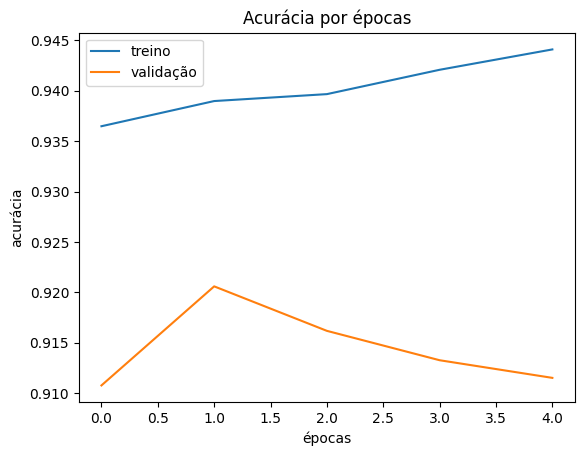

In [54]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

- Observando a perda por épocas

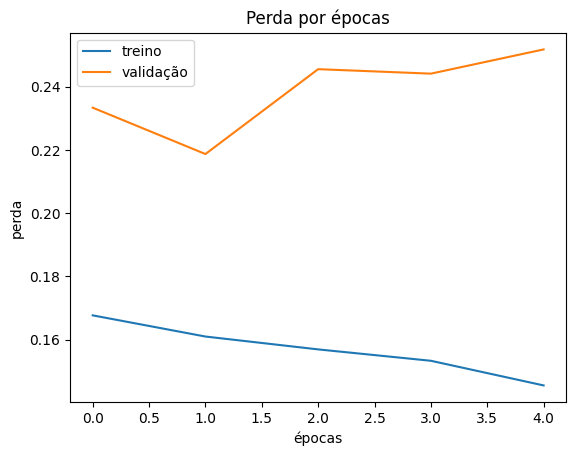

In [55]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Observando ambos os gráficos, nota-se que o treino está melhorando conforme as épocas avançam, enquanto tanto a acurácia quanto a perda da validação estão piorando à medida que as épocas avançam. Da mesma forma, encontra-se um ponto de convergência no qual tanto treino quanto validação, possuem um ponto positivo juntas. Será que se adicionarmos mais épocas podemos melhorar a precisão do modelo no que se refere ao treino, mas em especial a sua validação ?

In [56]:
# Treinando o modelo com a validação:
historico = modelo_3.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1461 - accuracy: 0.9437 - val_loss: 0.2492 - val_accuracy: 0.9143
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1418 - accuracy: 0.9459 - val_loss: 0.2487 - val_accuracy: 0.9155
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1330 - accuracy: 0.9489 - val_loss: 0.2877 - val_accuracy: 0.9115
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1334 - accuracy: 0.9485 - val_loss: 0.2718 - val_accuracy: 0.9144
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1291 - accuracy: 0.9506 - val_loss: 0.2752 - val_accuracy: 0.9107
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1282 - accuracy: 0.9500 - val_loss: 0.2959 - val_accuracy: 0.9093
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1229 - accuracy: 0.9531 - val_loss: 0.2791 - val_acc

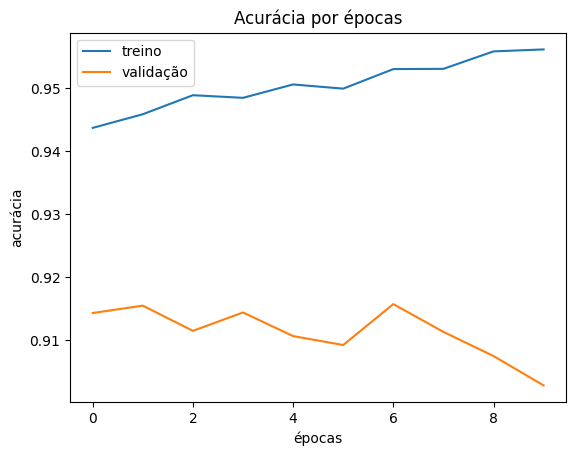

In [57]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

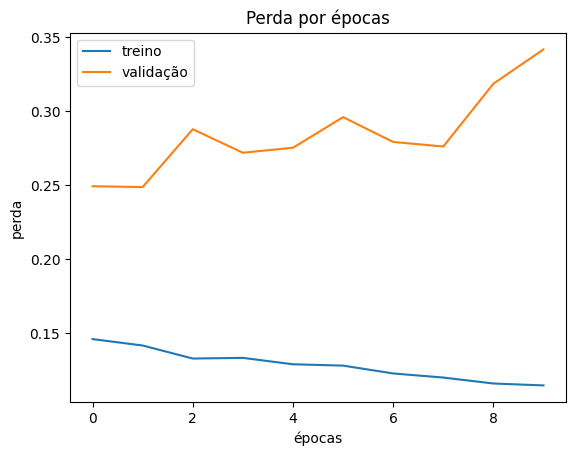

In [58]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

De fato, ao adicionar mais épocas ao modelo para ele treinar nos permite saber, para o presente caso, visualizando graficamente, que o ponto de ótimo no qual tanto o treino quanto a validação, no que tange à perda e acurácia de cada qual, se dá entorno da época 6.

In [59]:
# Treinando o modelo com 6 épocas:
historico = modelo_3.fit(X_train, y_train, epochs = 6, validation_split = 0.2)

Epoch 1/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1122 - accuracy: 0.9580 - val_loss: 0.3334 - val_accuracy: 0.9034
Epoch 2/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1055 - accuracy: 0.9590 - val_loss: 0.3124 - val_accuracy: 0.9100
Epoch 3/6
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1144 - accuracy: 0.9571 - val_loss: 0.3879 - val_accuracy: 0.9043
Epoch 4/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1043 - accuracy: 0.9589 - val_loss: 0.3416 - val_accuracy: 0.9103
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0990 - accuracy: 0.9622 - val_loss: 0.3259 - val_accuracy: 0.9104
Epoch 6/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0996 - accuracy: 0.9618 - val_loss: 0.3625 - val_accuracy: 0.9047


Exception ignored in: <function _xla_gc_callback at 0x7839b456dab0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


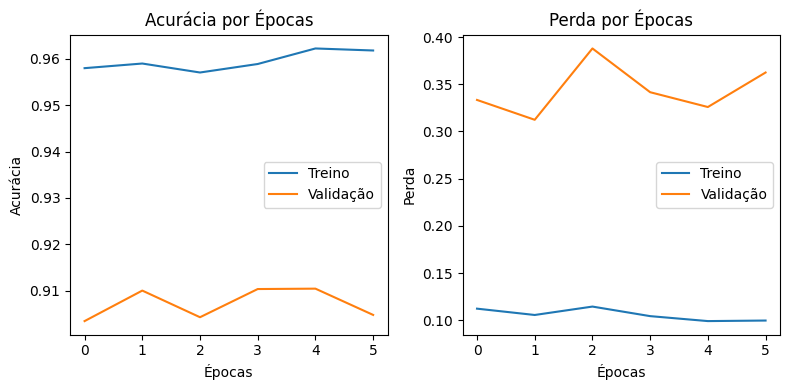

In [62]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotando o gráfico de acurácia
axs[0].plot(historico.history['accuracy'])
axs[0].plot(historico.history['val_accuracy'])
axs[0].set_title('Acurácia por Épocas')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['Treino', 'Validação'])

# Plotando o gráfico de perda
axs[1].plot(historico.history['loss'])
axs[1].plot(historico.history['val_loss'])
axs[1].set_title('Perda por Épocas')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda')
axs[1].legend(['Treino', 'Validação'])

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


Bom, parece que mesmo assim não trouxe resultados significativos, na forma em que a acurácia de treinamento continua melhor, bem como sua perda, do que da validação, e não é o que se deseja num modelo. Isso parece estar indicando que o modelo está incorrendo num processo de *overfitting*, estando sobretreinado aos dados, impedindo que ele tenha uma boa capacidade de generalização, que auxilia no processo da previsão. Que tal diminuir o seu sobretreino, impedindo que nem todas as camadas escondidas se ativem, "adormecendo-as" ? É isso que irei fazer agora. Por meio disso, diminuimos o overfit do modelo. Vejamos:

In [65]:
modelo_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),                                    # Dropout garante que 20% dos neurônios da camada escondida sejam desligados, dimimnuindo desse modo o overfit
    keras.layers.Dense(10, activation = tensorflow.nn.softmax )
])

modelo_4.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

# Treinando o modelo com a normalização:
historico = modelo_4.fit(X_train, y_train, epochs = 6, validation_split = 0.2) # validation_split reserva 20% do conjunto de teste para validação

Epoch 1/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5248 - accuracy: 0.8128 - val_loss: 0.4118 - val_accuracy: 0.8495
Epoch 2/6
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3987 - accuracy: 0.8558 - val_loss: 0.3775 - val_accuracy: 0.8599
Epoch 3/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3643 - accuracy: 0.8657 - val_loss: 0.3531 - val_accuracy: 0.8708
Epoch 4/6
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3409 - accuracy: 0.8754 - val_loss: 0.3563 - val_accuracy: 0.8690
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3276 - accuracy: 0.8796 - val_loss: 0.3274 - val_accuracy: 0.8822
Epoch 6/6
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3114 - accuracy: 0.8855 - val_loss: 0.3243 - val_accuracy: 0.8813


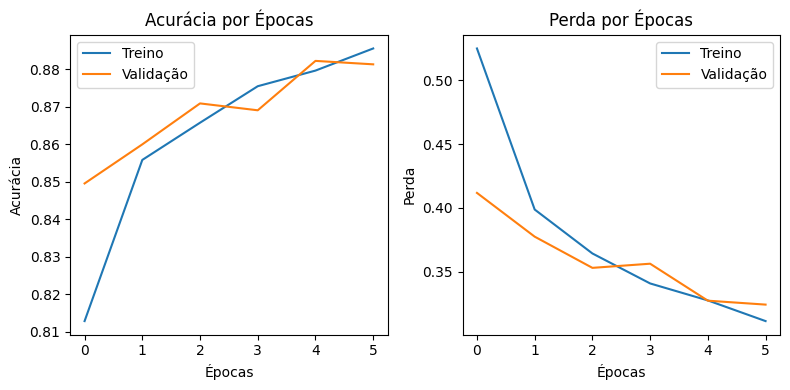

In [66]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotando o gráfico de acurácia
axs[0].plot(historico.history['accuracy'])
axs[0].plot(historico.history['val_accuracy'])
axs[0].set_title('Acurácia por Épocas')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['Treino', 'Validação'])

# Plotando o gráfico de perda
axs[1].plot(historico.history['loss'])
axs[1].plot(historico.history['val_loss'])
axs[1].set_title('Perda por Épocas')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda')
axs[1].legend(['Treino', 'Validação'])

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


Analisando novamente os gráficos, conseguimos observar que agora, após usar o Dropout, adormecendo cerca de 20% dos neurônios da camada de processamento (ou escondida), o modelo reduziu o seu overfit, produzindo, na época 4 um cenário no qual tanto a acurácia quanto a perda foram melhorados.